## Importando bibliotecas

In [1]:
!pip install python-twitter

In [2]:
import twitter
import json

In [3]:
from nltk import word_tokenize
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

## Configurando api

In [4]:
# Carregando o arquivo de configuração
with open('tokens.json') as f:
    data = json.load(f)

In [5]:
# Carregando a API do Twitter, utilizando os dados do arquivo json
api = twitter.Api(**data)

In [6]:
# Testa se tudo está certo
# Caso tiver alguma credencial errada, o resultado será:
#twitter.error.TwitterError: [{'code': 32, 'message': 'Could not authenticate you.'}]

print(api.VerifyCredentials())

{"created_at": "Tue Jul 26 22:26:37 +0000 2016", "default_profile": true, "default_profile_image": true, "friends_count": 1, "id": 758066017742512128, "id_str": "758066017742512128", "name": "Malu Freitas", "profile_background_color": "F5F8FA", "profile_image_url": "http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_image_url_https": "https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "screen_name": "MaluMalufrt"}


In [7]:
# A API do Twitter permite fazer diversos tipos de consultas. 
# Função que, a partir de uma lista de status, mostra o nome do usuário e o texto do twitter.

def print_status(status_list):
    for status in status_list:
        print('(' + str(status.created_at) + ') ' + str(status.user.name) + ':' + str(status.text) + '\n')

## Buscando dados do twitter

In [8]:
# Busca por termo

status_list = api.GetSearch(term="xiaomi",
                            lang='pt',
                            count=100,
                            result_type='mixed')

In [9]:
# Busca por termo e data

status_list = api.GetSearch(term="xiaomi",
                            lang='pt',
                            count=100,
                            result_type='mixed',
                            since='2019-12-18',
                            until='2019-12-19')

## Criando lista com os tweets

In [10]:
def cria_tweet_list(status_list):
    tweet_list = []
    
    for tweet in status_list:
        tweet_list.append(tweet.text)
    
    return tweet_list

In [11]:
# Printando elementos
print_status(status_list)

(Wed Dec 18 23:59:38 +0000 2019) kwam:RT @PlebeusOciosos: Xiaomi svbmete a maçã  à felação! https://t.co/U8edKlKfgr

(Wed Dec 18 23:59:36 +0000 2019) Gárgula🇵🇰:RT @PlebeusOciosos: Xiaomi svbmete a maçã  à felação! https://t.co/U8edKlKfgr

(Wed Dec 18 23:58:51 +0000 2019) Boy Magia Negra ☭:@queriacozinhar Os Xiaomi tão da hora hein?

(Wed Dec 18 23:57:48 +0000 2019) Lucas:@Joao_Electro dei uma pesquisada aqui pq tava pensando em pegar um xiaomi, parece que é problema de certificado (wi… https://t.co/kDdGw2ECN8

(Wed Dec 18 23:57:37 +0000 2019) Sailor Vênus:Felipe me deu um XIAOMI de natal.

Eu tenho o melhor namorado do mundo meu deus 🥺🥺

(Wed Dec 18 23:56:57 +0000 2019) rainha do drama:@aprochegue mais uma testemunha de Xiaomi, amém

(Wed Dec 18 23:56:05 +0000 2019) jota🎄:RT @PlebeusOciosos: Xiaomi svbmete a maçã  à felação! https://t.co/U8edKlKfgr

(Wed Dec 18 23:54:46 +0000 2019) Lorყ ✨:@caldas_rayana Tal de xiaomi, a câmera é igual iPhone..

(Wed Dec 18 23:54:41 +0000 2019) Aelin A.

In [12]:
print(len(status_list))

100


In [13]:
tweet_list = cria_tweet_list(status_list)

In [14]:
print(tweet_list)

['RT @PlebeusOciosos: Xiaomi svbmete a maçã  à felação! https://t.co/U8edKlKfgr', 'RT @PlebeusOciosos: Xiaomi svbmete a maçã  à felação! https://t.co/U8edKlKfgr', '@queriacozinhar Os Xiaomi tão da hora hein?', '@Joao_Electro dei uma pesquisada aqui pq tava pensando em pegar um xiaomi, parece que é problema de certificado (wi… https://t.co/kDdGw2ECN8', 'Felipe me deu um XIAOMI de natal.\n\nEu tenho o melhor namorado do mundo meu deus 🥺🥺', '@aprochegue mais uma testemunha de Xiaomi, amém', 'RT @PlebeusOciosos: Xiaomi svbmete a maçã  à felação! https://t.co/U8edKlKfgr', '@caldas_rayana Tal de xiaomi, a câmera é igual iPhone..', 'RT @XiaomiBrasil: Você já encontra o Mi Note 10 em lojas selecionadas Vivo em SP! É a 1ª operadora a vender Xiaomi de forma oficial e, no d…', '@iago_damacena é então, tava querendo ela ou o amazfit bip (um outro da xiaomi) mas não sei se devoooo', '@RainNowDo Kkkk to cm o cell da minha vó, enquanto o xiaomi ta no concerto, aí coloquei o cartâo de memória nele, e…

## Coloca os tweets da lista em um arquivo .csv

In [15]:
def cria_arquivo_csv(nome, lista):
    arquivo = open(nome, 'w', encoding='utf-8')
    
    for pos_tweet in range(len(lista)):
        arquivo.write('"' + str(lista[pos_tweet]) + '"')
        arquivo.write('\n')
        
    arquivo.close()

In [16]:
cria_arquivo_csv('xiaomi_18-12-2019_3.csv', tweet_list)

## Cria um data frame (depois dos dados extraidos)

In [17]:
# Criando data frame
df = pd.read_csv('classificado_xiaomi.csv', encoding='utf-8')

In [18]:
df.head()

,tweets,classes
0,Agr até eu quero um xiaomi,positivo
1,xiaomi= tudo pra mim. https://t.co/7lAvXTxa2J,positivo
2,RT @karnsteins: meu celular está 1 dia e 6 hor...,positivo
3,@Juliano_Fleck Se procura aplicativo usa o Sma...,positivo
4,@paginamemebro nn gosto da câmera do xiaomi,negativo


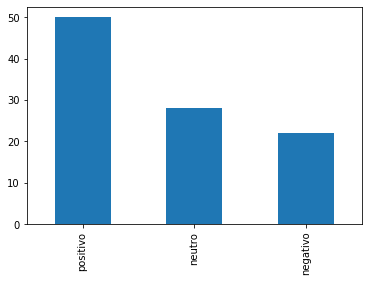

In [19]:
%matplotlib inline
df.classes.value_counts().plot(kind='bar')

In [20]:
df.classes.value_counts()

positivo    50
neutro      28
negativo    22
Name: classes, dtype: int64

In [21]:
df.tweets.count()

100

## Remove os tweets duplicados

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.tweets.count()

99

In [24]:
tweets = df['tweets']
classes = df['classes']

In [25]:
print(len(tweets))
print(len(classes))

99
99


## Limpeza dos dados

In [26]:
# Para limpeza dos dados
import nltk
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MaluF\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\MaluF\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MaluF\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MaluF\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
stopwords = set(nltk.corpus.stopwords.words('portuguese'))
print(stopwords)

{'ele', 'teria', 'houvera', 'a', 'por', 'suas', 'esses', 'tivermos', 'tem', 'deles', 'mesmo', 'não', 'houverão', 'do', 'houveria', 'mas', 'de', 'tua', 'minha', 'hajam', 'houvessem', 'os', 'elas', 'este', 'aquelas', 'estivesse', 'foram', 'dos', 'tuas', 'estávamos', 'tiver', 'numa', 'esta', 'sejamos', 'como', 'teu', 'forem', 'será', 'essa', 'dele', 'nossas', 'foi', 'temos', 'tinha', 'houveremos', 'fui', 'terei', 'o', 'só', 'sejam', 'eles', 'estive', 'seja', 'seria', 'estão', 'meus', 'há', 'sou', 'houverá', 'lhes', 'pelas', 'esteja', 'estivera', 'da', 'essas', 'sua', 'é', 'houver', 'terá', 'dela', 'com', 'são', 'para', 'quem', 'me', 'das', 'tu', 'estiverem', 'serei', 'seriam', 'houvéramos', 'serão', 'no', 'for', 'delas', 'se', 'seremos', 'seríamos', 'esse', 'fomos', 'em', 'ela', 'houverei', 'qual', 'tiverem', 'estavam', 'fora', 'tivemos', 'estivermos', 'esteve', 'aos', 'houve', 'hajamos', 'ou', 'hei', 'nós', 'tém', 'nem', 'vos', 'e', 'você', 'tenham', 'teríamos', 'houvéssemos', 'às', 'já'

In [28]:
def Preprocessing(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(',','').replace(';','').replace('-','').replace(':','').replace(')','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    stopwords.remove('não')
    palavras = [stemmer.stem(i) for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [29]:
testes = [Preprocessing(i) for i in tweets]

## Vetorização - Bag of words

In [32]:
# Instancia o objeto que faz a vectorização
#vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize) # Não ajudou
vectorizer = CountVectorizer(analyzer="word")

In [33]:
# Aplica o vetorizador nos dados
# Ajuste o modelo SVM de acordo com os dados de treinamento fornecidos.
freq_tweets = vectorizer.fit_transform(testes)
type(freq_tweets)

scipy.sparse.csr.csr_matrix

In [34]:
print(len(testes))

99


In [35]:
# Formato linha, coluna da matriz
freq_tweets.shape

(99, 405)

## Treinando o modelo

In [36]:
modelo = svm.SVC(kernel='linear')

In [37]:
modelo.fit(freq_tweets,classes)
#passando os tweets vetorizados (x, y) e as classes
#mostrando pro modelo como ele aprender como ele representa os sentimentos

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

## Para execução de 1000 tweets

In [38]:
# Criando data frame
df_execucao = pd.read_csv('xiaomi_1000.csv', encoding='utf-8')

In [39]:
df_execucao.head()

,tweets
0,Xiaomi torna-se a quarta maior fabricante mund...
1,espero que o xi jinping curta receber as fotos...
2,QUERO MEU XIAOMI PORRAAAAAAAAAAAAAAAAAAAAAAAAA...
3,"O meu pai esta consumido pela força xiaomi, at..."
4,sigo apaixonada pelo meu xiaomi ♥️


In [40]:
df_execucao.tweets.count()

1000

In [41]:
df_execucao.drop_duplicates(inplace=True)

In [42]:
df_execucao.tweets.count()

820

In [43]:
tweets_execucao = df_execucao['tweets']

In [44]:
tweets_execucao = [Preprocessing(i) for i in tweets_execucao]

In [45]:
freq_testes_2 = vectorizer.transform(tweets_execucao)

In [46]:
freq_testes_2.shape

(820, 405)

In [47]:
for t, c in zip (tweets_execucao,modelo.predict(freq_testes_2)):
    print (t +", "+ c)

xiaom tornas quart mai fabric mund, positivo
esper xi jinping curt receb fot tô tir bol xiaom tip, positivo
quer xiaom porraaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa, positivo
pai consum forç xiaom relógi compr, neutro
sig apaixon xiaom ♥️, positivo
xiaom irma pra jog fortnight vo ped pra baix, negativo
us adapt fon merd xiaom pq mat fon tip c, positivo
bel agr ja to pens peg xiaom, positivo
@faiglesil xiaom mig aqu topiss d+, positivo
além n ter compr xiaom faz us messeng pra fl cm, positivo
webnamor xiaom yeezy outr cachorr abdômen defin yeezy ach q, positivo
rt @tec_mund nov celul subsidiár xiaom começ ser vend chin part 12 dezembro!, positivo
pra inimig amig cham xiaom chernobyl, positivo
venh divert comig &gt 🎮 vem pra liv xiaom mi 9 🎮 #bigoliv, positivo
quer compr xiaom preç sub absurd, positivo
@victorya41 iphon melhor troc kkkk peg xiaom decepticon kkkkkkkkkkk, negativo
xiaom cust r$499900 brasil!!!! parabém pra gent né?, positivo
@face_acab animal fez xiaom trav ? kkkkk

## Matriz

In [48]:
freq_tweets.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Criando modelos com Pipelines

In [49]:
# Pipelines são interessantes para reduzir código e automatizar fluxos
from sklearn.pipeline import Pipeline

In [50]:
pipeline_svm_simples = Pipeline([
  ('counts', vectorizer),
  ('classifier', modelo)
])

## Validando os Modelos com Validação Cruzada

In [51]:
# Fazendo o cross validation do modelo
resultados = cross_val_predict(pipeline_svm_simples, testes, classes, cv=48)

c:\users\maluf\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 22 members, which is too few. The minimum number of members in any class cannot be less than n_splits=48.
  % (min_groups, self.n_splits)), Warning)


In [52]:
# Matriz de confusão
print(pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   negativo  neutro  positivo  All
Real                                     
negativo         7       3        12   22
neutro           3      11        14   28
positivo         2       4        43   49
All             12      18        69   99


In [53]:
# Medindo a acurácia média do modelo
metrics.accuracy_score(classes,resultados)

0.6161616161616161

In [54]:
acuracia = (7+11+43)/99
print('acuracia = ', acuracia)

acuracia =  0.6161616161616161


In [55]:
# Medidas de validação do modelo
sentimento=['positivo','negativo','neutro']
print (metrics.classification_report(classes,resultados,sentimento))

              precision    recall  f1-score   support

    positivo       0.62      0.88      0.73        49
    negativo       0.58      0.32      0.41        22
      neutro       0.61      0.39      0.48        28

    accuracy                           0.62        99
   macro avg       0.61      0.53      0.54        99
weighted avg       0.61      0.62      0.59        99



## Executando o modelo com 1000 tweets

In [56]:
mil_tweets = modelo.predict(freq_testes_2)

In [57]:
neutro=0
positivo=0
negativo=0
for i in mil_tweets:
    if i=='neutro':
        neutro+=1
    elif i=='positivo':
        positivo+=1
    else:
        negativo+=1
        
tamanho = len(mil_tweets)-1

print('neutro: ',neutro)
print('positivo: ', positivo)
print('negativo: ',negativo)
print(tamanho)

print('neutro: ', neutro/tamanho)
print('positivo: ', positivo/tamanho)
print('negativo: ', negativo/tamanho)

neutro:  211
positivo:  466
negativo:  143
819
neutro:  0.2576312576312576
positivo:  0.568986568986569
negativo:  0.1746031746031746
